# IMPORTING TENSORFLOW


In [ ]:
#mount oour drive on google to run objects from files stored there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#navigate to the directory
import os
os.chdir('/content/drive/My Drive/Smart-Garbage-Segregation-main')

In [ ]:
#install dependencies
!pip install -r /content/drive/MyDrive/Smart-Garbage-Segregation-main/Deployment/requirements.txt

In [ ]:
!pip install tensorflow

# IMPORTING TENSORFLOW

In [ ]:
import tensorflow as tf

# USING GPU on Google colab


In [ ]:
device = "/device:GPU:0"


# DATA IMPORTING

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "/content/drive/MyDrive/Smart-Garbage-Segregation-main/Data"

classes = os.listdir(dir_example)
print(classes)

['Train', 'Test']


In [ ]:
dir_example = "/content/drive/MyDrive/Smart-Garbage-Segregation-main/Data"

train_classes = os.listdir(dir_example)
print(train_classes)

['Train', 'Test']


# DATA VISUALIZATION

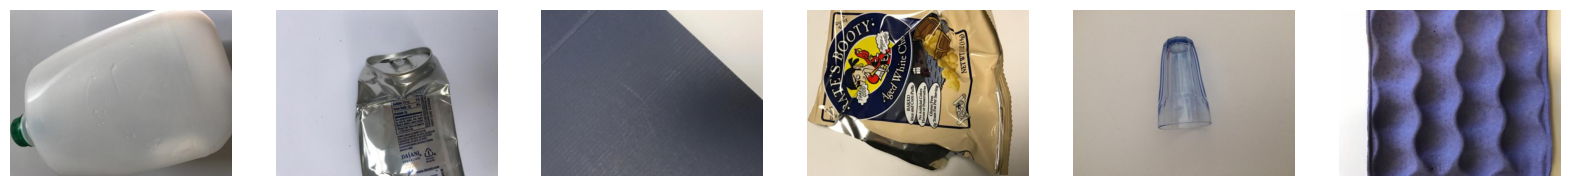

In [ ]:
dir_with_examples = '/content/drive/MyDrive/Smart-Garbage-Segregation-main/visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PREPARING OF DATA

In [ ]:
train = '/content/drive/MyDrive/Smart-Garbage-Segregation-main/Data/Train'
test = '/content/drive/MyDrive/Smart-Garbage-Segregation-main/Data/Test'

In [ ]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2186 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [ ]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


# LABELING

In [ ]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# CREATING MODEL

In [ ]:
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the model
model = Sequential()

# Convolution blocks
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification layers
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# COMPILING MODEL  

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 300, 300, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43808)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,803,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,843,910 (10.85 MB)

 Trainable params: 2,843,910 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

# TRAINING THE MODEL(10 EPOCHS)

In [ ]:
model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=2184 // 32
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 553s 7s/step - accuracy: 0.1683 - loss: 1.9526
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 407us/step - accuracy: 0.3438 - loss: 1.7286
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


68/68 ━━━━━━━━━━━━━━━━━━━━ 415s 6s/step - accuracy: 0.3280 - loss: 1.6497
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 217us/step - accuracy: 0.3750 - loss: 1.6125
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 435s 6s/step - accuracy: 0.4026 - loss: 1.4957
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 178us/step - accuracy: 0.3750 - loss: 1.4922
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 391s 6s/step - accuracy: 0.4546 - loss: 1.3369
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 175us/step - accuracy: 0.5312 - loss: 1.3639
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 401s 6s/step - accuracy: 0.5301 - loss: 1.1877
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 175us/step - accuracy: 0.4688 - loss: 1.4852


# TESTING PREDICTION

In [ ]:
import keras.utils as ku
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Probability: 0.2853328
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

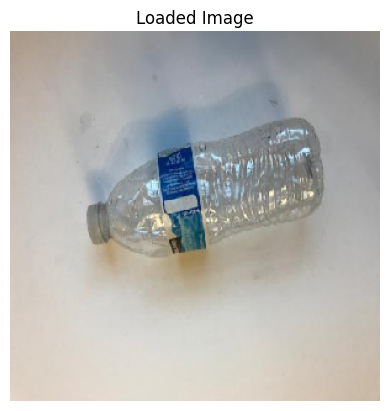

In [ ]:
test_img = '/content/drive/MyDrive/Smart-Garbage-Segregation-main/Data/Test/plastic/plastic447.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")


In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 5.53 %
GLASS : 25.93 %
METAL : 14.8 %
PAPER : 11.45 %
PLASTIC : 28.53 %
TRASH : 13.75 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Probability: 0.26644206
Classified: cardboard 



Text(0.5, 1.0, 'Loaded Image')

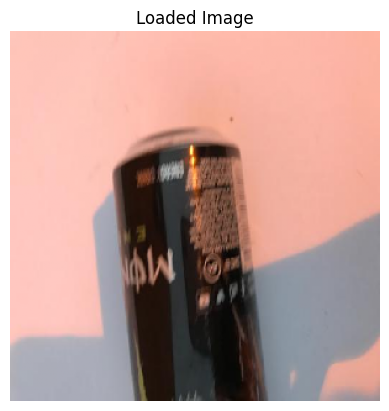

In [ ]:
test_img = '/content/drive/MyDrive/Smart-Garbage-Segregation-main/Data/Test/metal/metal368.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 26.64 %
GLASS : 26.53 %
METAL : 19.55 %
PAPER : 6.64 %
PLASTIC : 9.18 %
TRASH : 11.45 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Probability: 0.29755136
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

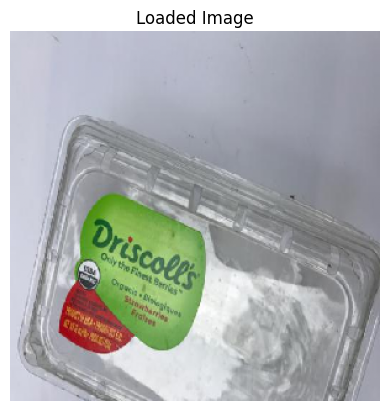

In [ ]:
test_img = '/content/drive/MyDrive/Smart-Garbage-Segregation-main/Data/Test/plastic/plastic437.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 16.43 %
GLASS : 17.4 %
METAL : 8.99 %
PAPER : 23.57 %
PLASTIC : 29.76 %
TRASH : 3.86 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Probability: 0.99384755
Classified: cardboard 



Text(0.5, 1.0, 'Loaded Image')

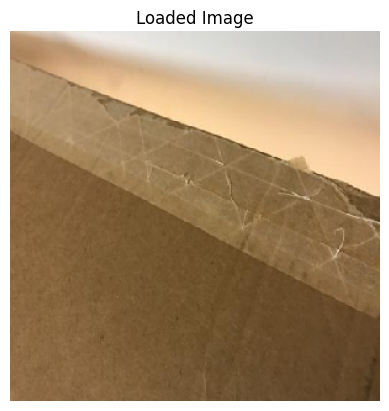

In [ ]:
test_img = '/content/drive/MyDrive/Smart-Garbage-Segregation-main/Data/Test/cardboard/cardboard364.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 99.38 %
GLASS : 0.44 %
METAL : 0.03 %
PAPER : 0.0 %
PLASTIC : 0.07 %
TRASH : 0.08 %


#Looking at how it identifies trash


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Probability: 0.3165301
Classified: cardboard 



Text(0.5, 1.0, 'Loaded Image')

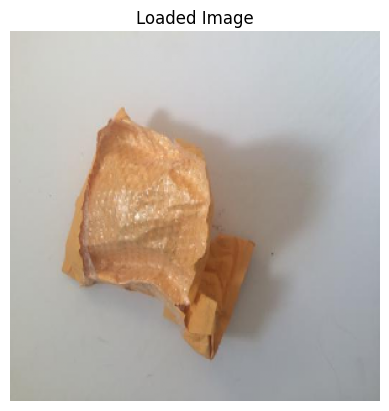

In [ ]:
test_img = '/content/drive/MyDrive/Smart-Garbage-Segregation-main/Data/Test/trash/trash136.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [ ]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 28.03 %
GLASS : 23.27 %
METAL : 11.22 %
PAPER : 9.2 %
PLASTIC : 14.42 %
TRASH : 13.86 %


#ENTIRE PREDICTION + RECOMMENDATION FOR PREDICTION USING GRADIO



In [ ]:
!pip install Gradio

In [ ]:
import gradio as gr
import numpy as np
from keras.preprocessing import image as ku
from PIL import Image, UnidentifiedImageError

# Define labels and recyclable classes
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
recyclable_classes = {'cardboard', 'glass', 'metal', 'paper', 'plastic'}

def predict_image(uploaded_img):
    try:
        # Ensure the image is valid
        if uploaded_img is None:
            return {"Error": "No image provided."}

        # Resize and preprocess the image
        uploaded_img = uploaded_img.convert("RGB")  # Ensure RGB format
        img = uploaded_img.resize((300, 300))  # Adjust dimensions as per model
        img = ku.img_to_array(img, dtype=np.uint8)
        img = np.array(img) / 255.0

        # Predict the class
        prediction = model.predict(img[np.newaxis, ...])
        probability = np.max(prediction[0], axis=-1)
        predicted_class = labels[np.argmax(prediction[0], axis=-1)]

        # Determine recommendation
        recommendation = "Recycle" if predicted_class in recyclable_classes else "Trash"

        return {
            "Classified": predicted_class,
            "Probability": round(probability * 100, 2),
            "Recommendation": recommendation
        }
    except UnidentifiedImageError:
        return {"Error": "Uploaded file is not a valid image."}
    except Exception as e:
        return {"Error": f"An unexpected error occurred: {str(e)}"}

# Create Gradio interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="json",
    title="Recycle or Trash Predictor",
    description="Upload an image to find out if it should be recycled or trashed!"
)

# Launch the interface
interface.launch()



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3b66f1c522d4f9945a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Probability: 52.77 %
Classified: metal
Recommendation: Recycle 

Class Probabilities:
CARDBOARD: 1.95 %
GLASS: 9.97 %
METAL: 52.77 %
PAPER: 30.03 %
PLASTIC: 1.21 %
TRASH: 4.07 %


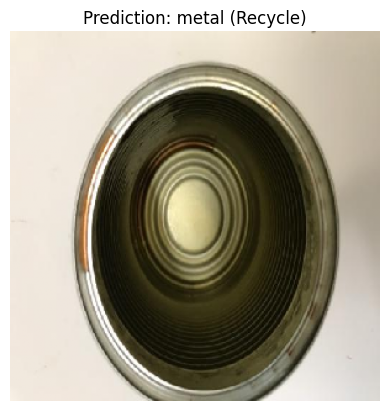

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image as ku

# Define labels and recyclable classes
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
recyclable_classes = {'cardboard', 'glass', 'metal', 'paper', 'plastic'}

# Load and preprocess the test image
test_img = '/content/drive/MyDrive/Smart-Garbage-Segregation-main/Data/Test/metal/metal377.jpg'
img = ku.load_img(test_img, target_size=(300, 300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img) / 255.0

# Predict the class
prediction = model.predict(img[np.newaxis, ...])
probability = np.max(prediction[0], axis=-1)
predicted_class = labels[np.argmax(prediction[0], axis=-1)]

# Determine if the item is recyclable or trash
if predicted_class in recyclable_classes:
    recommendation = "Recycle"
else:
    recommendation = "Trash"

# Display the prediction and recommendation
print("Probability:", round(probability * 100, 2), "%")
print("Classified:", predicted_class)
print("Recommendation:", recommendation, "\n")

# Display detailed probabilities for all classes
print("Class Probabilities:")
for i, prob in enumerate(prediction[0]):
    print(f"{labels[i].upper()}: {round(prob * 100, 2)} %")

# Display the image
plt.axis('off')
plt.imshow(img.squeeze())
plt.title(f"Prediction: {predicted_class} ({recommendation})")
plt.show()


# SAVING THE TRAINED MODEL

In [ ]:
model.save('modelnew.h5')